In [1]:
import mne
import numpy as np
import glob
from past.builtins import unicode
import xlrd
import pandas as pd

In [2]:
#读取SE数据
data_dir_file=r"./SE_train/"
data_file_path=sorted(glob.glob(data_dir_file+"*"))
# data_file_path
print(len(data_file_path))

120


In [3]:
data_file_path

['./SE_train\\Z何富桂20220221_bias_0.fif',
 './SE_train\\Z何富桂20220225_bias_0.fif',
 './SE_train\\Z何富桂20220228_bias_0.fif',
 './SE_train\\Z何富桂20220302_bias_0.fif',
 './SE_train\\Z倪诗瑄20220311_bias_0.fif',
 './SE_train\\Z倪诗瑄20220314_bias_0.fif',
 './SE_train\\Z倪诗瑄20220316_bias_0.fif',
 './SE_train\\Z倪诗瑄20220318_bias_0.fif',
 './SE_train\\Z刘家瑞20220225_bias_0.fif',
 './SE_train\\Z刘家瑞20220228_bias_0.fif',
 './SE_train\\Z刘家瑞20220302_bias_0.fif',
 './SE_train\\Z周小凯20220314_bias_0.fif',
 './SE_train\\Z周小凯20220316_bias_0.fif',
 './SE_train\\Z周小凯20220318_bias_0.fif',
 './SE_train\\Z周小凯20220321_bias_0.fif',
 './SE_train\\Z孙彭辉20220225_bias_0.fif',
 './SE_train\\Z孙彭辉20220228_bias_0.fif',
 './SE_train\\Z孙彭辉20220302_bias_0.fif',
 './SE_train\\Z孙彭辉20220304_bias_0.fif',
 './SE_train\\Z张璐20220225_bias_0.fif',
 './SE_train\\Z张璐20220228_bias_0.fif',
 './SE_train\\Z张璐20220302_bias_0.fif',
 './SE_train\\Z徐珍英20220218（未发作）_bias_0.fif',
 './SE_train\\Z徐珍英20220218（未发作）_bias_2.fif',
 './SE_train\\Z徐珍英20220218（未发作）_b

In [4]:
#发作为1；未发作为0
y_train=[]
for i in data_file_path:
    if i.find('未发作')==-1:
        # 找不到未发作，即发作，记为1
        y_train.append(1)
    else:
        y_train.append(0)
print(len(y_train))

120


In [5]:
#每16s数据截成8段2s，所以y也要变成8*17倍长度
# 截成 4段4s，y变成4*17的长度
# 改成 2段8s，y变成2*17的长度
# 直接16s，y长度为1*17
y_long_data=[]
for i in y_train:
    for j in range(8*17):
        y_long_data.append(i)
y_train=y_long_data
print(len(y_long_data))

16320


In [6]:
import scipy.signal
import scipy.io as scio    
channels_selected=17
samps = 2

In [7]:
x_train=[]
for i in data_file_path:
    raw = mne.io.read_raw_fif(i)
    data,time=raw[:]
    for k in range(channels_selected):
        data_channel = data[k]
        for j in range(0,16,samps):
            data_temp = data_channel[j*256:(j+samps)*256]
            x_train.append(data_temp)

Opening raw data file ./SE_train\Z何富桂20220221_bias_0.fif...
Isotrak not found
    Range : 8919 ... 25303 =      8.710 ...    24.710 secs
Ready.
Opening raw data file ./SE_train\Z何富桂20220225_bias_0.fif...
Isotrak not found
    Range : 233098 ... 249482 =    227.635 ...   243.635 secs
Ready.
Opening raw data file ./SE_train\Z何富桂20220228_bias_0.fif...


<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z何富桂20220221_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z何富桂20220225_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z何富桂20220228_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif

Isotrak not found
    Range : 10580 ... 26964 =     10.332 ...    26.332 secs
Ready.
Opening raw data file ./SE_train\Z何富桂20220302_bias_0.fif...
Isotrak not found
    Range : 133777 ... 150161 =    130.642 ...   146.642 secs
Ready.
Opening raw data file ./SE_train\Z倪诗瑄20220311_bias_0.fif...
Isotrak not found
    Range : 2646 ... 19030 =      2.584 ...    18.584 secs
Ready.
Opening raw data file ./SE_train\Z倪诗瑄20220314_bias_0.fif...
Isotrak not found
    Range : 112910 ... 129294 =    110.264 ...   126.264 secs
Ready.
Opening raw data file ./SE_train\Z倪诗瑄20220316_bias_0.fif...
Isotrak not found
    Range : 132169 ... 148553 =    129.071 ...   145.071 secs
Ready.
Opening raw data file ./SE_train\Z倪诗瑄20220318_bias_0.fif...
Isotrak not found
    Range : 29274 ... 45658 =     28.588 ...    44.588 secs
Ready.
Opening raw data file ./SE_train\Z刘家瑞20220225_bias_0.fif...
Isotrak not found
    Range : 167605 ... 183989 =    163.677 ...   179.677 secs
Ready.
Opening raw data file ./SE_train\Z刘家瑞2

<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z何富桂20220302_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z倪诗瑄20220311_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z倪诗瑄20220314_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif

    Range : 61765 ... 78149 =     60.317 ...    76.317 secs
Ready.
Opening raw data file ./SE_train\Z孙彭辉20220225_bias_0.fif...
Isotrak not found
    Range : 39640 ... 56024 =     38.711 ...    54.711 secs
Ready.
Opening raw data file ./SE_train\Z孙彭辉20220228_bias_0.fif...
Isotrak not found
    Range : 106204 ... 122588 =    103.715 ...   119.715 secs
Ready.
Opening raw data file ./SE_train\Z孙彭辉20220302_bias_0.fif...
Isotrak not found
    Range : 54366 ... 70750 =     53.092 ...    69.092 secs
Ready.
Opening raw data file ./SE_train\Z孙彭辉20220304_bias_0.fif...
Isotrak not found
    Range : 12352 ... 28736 =     12.062 ...    28.062 secs
Ready.
Opening raw data file ./SE_train\Z张璐20220225_bias_0.fif...
Isotrak not found
    Range : 25166 ... 41550 =     24.576 ...    40.576 secs
Ready.
Opening raw data file ./SE_train\Z张璐20220228_bias_0.fif...
Isotrak not found
    Range : 189771 ... 206155 =    185.323 ...   201.323 secs
Ready.
Opening raw data file ./SE_train\Z张璐20220302_bias_0.fif...
Is

<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z孙彭辉20220225_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z孙彭辉20220228_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z孙彭辉20220302_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif

Isotrak not found
    Range : 63336 ... 79720 =     61.852 ...    77.852 secs
Ready.
Opening raw data file ./SE_train\Z徐珍英20220221（未发作）_bias_2.fif...
Isotrak not found
    Range : 65384 ... 81768 =     63.852 ...    79.852 secs
Ready.
Opening raw data file ./SE_train\Z徐珍英20220221（未发作）_bias_4.fif...
Isotrak not found
    Range : 67432 ... 83816 =     65.852 ...    81.852 secs
Ready.
Opening raw data file ./SE_train\Z徐珍英20220221（未发作）_bias_6.fif...
Isotrak not found
    Range : 69480 ... 85864 =     67.852 ...    83.852 secs
Ready.
Opening raw data file ./SE_train\Z徐珍英20220221（未发作）_bias_8.fif...
Isotrak not found
    Range : 71528 ... 87912 =     69.852 ...    85.852 secs
Ready.
Opening raw data file ./SE_train\Z徐珍英20220223_bias_0.fif...
Isotrak not found
    Range : 181813 ... 198197 =    177.552 ...   193.552 secs
Ready.
Opening raw data file ./SE_train\Z徐珍英20220225_bias_0.fif...
Isotrak not found
    Range : 23786 ... 40170 =     23.229 ...    39.229 secs
Ready.
Opening raw data file .

<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z徐珍英20220221（未发作）_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z徐珍英20220221（未发作）_bias_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z徐珍英20220221（未发作）_bias_4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.g

Isotrak not found
    Range : 17807 ... 34191 =     17.390 ...    33.390 secs
Ready.
Opening raw data file ./SE_train\Z曾刚20220223_bias_0.fif...
Isotrak not found
    Range : 70270 ... 86654 =     68.623 ...    84.623 secs
Ready.
Opening raw data file ./SE_train\Z李玉萍20220216_bias_0.fif...
Isotrak not found
    Range : 50628 ... 67012 =     49.441 ...    65.441 secs
Ready.
Opening raw data file ./SE_train\Z李玉萍20220218_bias_0.fif...
Isotrak not found
    Range : 55675 ... 72059 =     54.370 ...    70.370 secs
Ready.
Opening raw data file ./SE_train\Z李玉萍20220221（未发作）_bias_0.fif...
Isotrak not found
    Range : 37414 ... 53798 =     36.537 ...    52.537 secs
Ready.
Opening raw data file ./SE_train\Z李玉萍20220221（未发作）_bias_2.fif...
Isotrak not found
    Range : 39462 ... 55846 =     38.537 ...    54.537 secs
Ready.
Opening raw data file ./SE_train\Z李玉萍20220221（未发作）_bias_4.fif...
Isotrak not found
    Range : 41510 ... 57894 =     40.537 ...    56.537 secs
Ready.
Opening raw data file ./SE_trai

<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z曾刚20220221_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z曾刚20220223_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z李玉萍20220216_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.g

    Range : 49993 ... 66377 =     48.821 ...    64.821 secs
Ready.
Opening raw data file ./SE_train\Z杜娇20220325（未发作）_bias_0.fif...
Isotrak not found
    Range : 92841 ... 109225 =     90.665 ...   106.665 secs
Ready.
Opening raw data file ./SE_train\Z杜娇20220325（未发作）_bias_2.fif...
Isotrak not found
    Range : 94889 ... 111273 =     92.665 ...   108.665 secs
Ready.
Opening raw data file ./SE_train\Z杜娇20220325（未发作）_bias_4.fif...
Isotrak not found
    Range : 96937 ... 113321 =     94.665 ...   110.665 secs
Ready.
Opening raw data file ./SE_train\Z杜娇20220325（未发作）_bias_6.fif...
Isotrak not found
    Range : 98985 ... 115369 =     96.665 ...   112.665 secs
Ready.
Opening raw data file ./SE_train\Z杜娇20220325（未发作）_bias_8.fif...
Isotrak not found
    Range : 101033 ... 117417 =     98.665 ...   114.665 secs
Ready.
Opening raw data file ./SE_train\Z林儒波20220323_bias_0.fif...
Isotrak not found
    Range : 467832 ... 484216 =    456.867 ...   472.867 secs
Ready.
Opening raw data file ./SE_train\Z林

<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z杜娇20220325（未发作）_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z杜娇20220325（未发作）_bias_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z杜娇20220325（未发作）_bias_4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, 

Isotrak not found
    Range : 83008 ... 99392 =     81.062 ...    97.062 secs
Ready.
Opening raw data file ./SE_train\Z林攀攀20220223（未发作）_bias_2.fif...
Isotrak not found
    Range : 85056 ... 101440 =     83.062 ...    99.062 secs
Ready.
Opening raw data file ./SE_train\Z林攀攀20220223（未发作）_bias_4.fif...
Isotrak not found
    Range : 87104 ... 103488 =     85.062 ...   101.062 secs
Ready.
Opening raw data file ./SE_train\Z林攀攀20220223（未发作）_bias_6.fif...
Isotrak not found
    Range : 89152 ... 105536 =     87.062 ...   103.062 secs
Ready.
Opening raw data file ./SE_train\Z林攀攀20220223（未发作）_bias_8.fif...
Isotrak not found
    Range : 91200 ... 107584 =     89.062 ...   105.062 secs
Ready.
Opening raw data file ./SE_train\Z林攀攀20220225（未发作）_bias_0.fif...
Isotrak not found
    Range : 13771 ... 30155 =     13.448 ...    29.448 secs
Ready.
Opening raw data file ./SE_train\Z林攀攀20220225（未发作）_bias_2.fif...
Isotrak not found
    Range : 15819 ... 32203 =     15.448 ...    31.448 secs
Ready.
Opening raw

<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z林攀攀20220223（未发作）_bias_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z林攀攀20220223（未发作）_bias_4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z林攀攀20220223（未发作）_bias_6.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.g

Opening raw data file ./SE_train\Z沈伟20220314（未发作）_bias_4.fif...
Isotrak not found
    Range : 55275 ... 71659 =     53.979 ...    69.979 secs
Ready.
Opening raw data file ./SE_train\Z沈伟20220314（未发作）_bias_6.fif...
Isotrak not found
    Range : 57323 ... 73707 =     55.979 ...    71.979 secs
Ready.
Opening raw data file ./SE_train\Z沈伟20220314（未发作）_bias_8.fif...
Isotrak not found
    Range : 59371 ... 75755 =     57.979 ...    73.979 secs
Ready.
Opening raw data file ./SE_train\Z沈伟20220316_bias_0.fif...
Isotrak not found
    Range : 156928 ... 173312 =    153.250 ...   169.250 secs
Ready.
Opening raw data file ./SE_train\Z沈伟20220318_bias_0.fif...
Isotrak not found
    Range : 50914 ... 67298 =     49.721 ...    65.721 secs
Ready.
Opening raw data file ./SE_train\Z王宜凡20220318_bias_0.fif...
Isotrak not found
    Range : 118132 ... 134516 =    115.363 ...   131.363 secs
Ready.
Opening raw data file ./SE_train\Z王宜凡20220321_bias_0.fif...
Isotrak not found
    Range : 67221 ... 83605 =     65.6

<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z沈伟20220314（未发作）_bias_4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z沈伟20220314（未发作）_bias_6.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z沈伟20220314（未发作）_bias_8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, 

    Range : 23231 ... 39615 =     22.687 ...    38.687 secs
Ready.
Opening raw data file ./SE_train\Z肖星星20220330（未发作）_bias_6.fif...
Isotrak not found
    Range : 25279 ... 41663 =     24.687 ...    40.687 secs
Ready.
Opening raw data file ./SE_train\Z肖星星20220330（未发作）_bias_8.fif...
Isotrak not found
    Range : 27327 ... 43711 =     26.687 ...    42.687 secs
Ready.
Opening raw data file ./SE_train\Z肖星星20220401_bias_0.fif...
Isotrak not found
    Range : 84137 ... 100521 =     82.165 ...    98.165 secs
Ready.
Opening raw data file ./SE_train\Z肖智华20220225（未发作）_bias_0.fif...
Isotrak not found
    Range : 3029 ... 19413 =      2.958 ...    18.958 secs
Ready.
Opening raw data file ./SE_train\Z肖智华20220225（未发作）_bias_2.fif...
Isotrak not found
    Range : 5077 ... 21461 =      4.958 ...    20.958 secs
Ready.
Opening raw data file ./SE_train\Z肖智华20220225（未发作）_bias_4.fif...
Isotrak not found
    Range : 7125 ... 23509 =      6.958 ...    22.958 secs
Ready.
Opening raw data file ./SE_train\Z肖智华202

<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z肖星星20220330（未发作）_bias_6.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z肖星星20220330（未发作）_bias_8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z肖星星20220401_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, ra

    Range : 4442 ... 20826 =      4.338 ...    20.338 secs
Ready.
Opening raw data file ./SE_train\Z赵丽兰20220304_bias_0.fif...
Isotrak not found
    Range : 2779 ... 19163 =      2.714 ...    18.714 secs
Ready.
Opening raw data file ./SE_train\Z雷振20220321_bias_0.fif...
Isotrak not found
    Range : 65290 ... 81674 =     63.760 ...    79.760 secs
Ready.
Opening raw data file ./SE_train\Z雷振20220323_bias_0.fif...
Isotrak not found
    Range : 203788 ... 220172 =    199.012 ...   215.012 secs
Ready.
Opening raw data file ./SE_train\Z雷振20220325_bias_0.fif...
Isotrak not found
    Range : 45887 ... 62271 =     44.812 ...    60.812 secs
Ready.
Opening raw data file ./SE_train\Z雷振20220328_bias_0.fif...
Isotrak not found
    Range : 6400 ... 22784 =      6.250 ...    22.250 secs
Ready.
Opening raw data file ./SE_train\Z黄盈雪20220314_bias_0.fif...
Isotrak not found
    Range : 20114 ... 36498 =     19.643 ...    35.643 secs
Ready.
Opening raw data file ./SE_train\Z黄盈雪20220316_bias_0.fif...
Isotrak 

<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z赵丽兰20220304_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z雷振20220321_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-fc06b502cc39>:3: RuntimeWarning: This filename (./SE_train\Z雷振20220323_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.g

    Range : 150366 ... 166750 =    146.842 ...   162.842 secs
Ready.


In [8]:
len(x_train) #17 * 92 * n段=1564 * n

16320

In [9]:
path = "./SE_parameter/train_matched_stimulate_parameter.xlsx"
df = pd.read_excel(path,engine='openpyxl')
df=df.drop(['Unnamed: 0'],axis=1)
df

,parameter
0,1
1,4
2,3
3,2
4,3
...,...
115,3
116,1
117,4
118,2


In [10]:
# 引入刺激参数
ECT_code = []

for i in range(df.shape[0]):
    if df.iloc[i,0] == 1:
        ECT_code.append([0,0])
    if df.iloc[i,0] == 2:
        ECT_code.append([0,1])
    if df.iloc[i,0] == 3:
        ECT_code.append([1,0])
    if df.iloc[i,0] == 4:
        ECT_code.append([1,1])

ECT_code = np.array(ECT_code)
long_ECT_code = [i for i in ECT_code for k in range(8*17)]
long_ECT_code = np.array(long_ECT_code)
long_ECT_code.shape

(16320, 2)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Concatenate
from tensorflow.keras.layers import Conv1D, MaxPooling1D

In [12]:
# 每次都要记得更改输入的shape
#input1->conv1->pool1->conv2->pool2->conv3->pool3->flatten->dense1->dense2->concatenate->dense3->out
input1=tf.keras.layers.Input(shape=(512,1))#单通道16s数据
input2=tf.keras.layers.Input(shape=(2,))#刺激参数

conv1=tf.keras.layers.Conv1D(64,5,padding='same',activation='relu')(input1)
pool1=tf.keras.layers.AveragePooling1D(pool_size=2,strides=2,padding='same')(conv1)#64*256

conv2=tf.keras.layers.Conv1D(32,5,padding='same',activation='relu')(pool1)
pool2=tf.keras.layers.AveragePooling1D(pool_size=2,strides=2,padding='same')(conv2)#32*128

conv3=tf.keras.layers.Conv1D(16,3,padding='same',activation='relu')(pool2)
pool3=tf.keras.layers.AveragePooling1D(pool_size=2,strides=2,padding='same')(conv3)#16*64

flatten1=tf.keras.layers.Flatten()(pool3)

dense1=tf.keras.layers.Dense(256,activation='relu')(flatten1)
dense2=tf.keras.layers.Dense(64,activation='relu')(dense1)
concatenate1=tf.keras.layers.Concatenate()([dense2,input2])
dense3=tf.keras.layers.Dense(20,activation='sigmoid')(concatenate1)
# dense3 = tf.keras.layers.Dense(20,activation='relu')(dense2)
out=tf.keras.layers.Dense(1,activation='sigmoid')(dense3)

# model=tf.keras.models.Model(inputs=input1,outputs=out)
model=tf.keras.models.Model(inputs=[input1,input2],outputs=out)

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 1)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 512, 64)      384         input_1[0][0]                    
__________________________________________________________________________________________________
average_pooling1d (AveragePooli (None, 256, 64)      0           conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 256, 32)      10272       average_pooling1d[0][0]          
______________________________________________________________________________________________

In [14]:
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='mse',  # 损失均方误差
              optimizer=adam,  # 优化器
              metrics='accuracy'
             )

C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [15]:
x_train=np.array(x_train)
y_train=np.array(y_train)#方便实用validation_split
long_ECT_code = np.array(long_ECT_code)

In [16]:
history = model.fit([x_train,long_ECT_code], y_train, 
                    batch_size = 8,epochs = 20,verbose = 1,
                    validation_split = 0.2  # 训练集的20%用作验证集
                   )

Epoch 1/20
1632/1632 [==============================] - 12s 7ms/step - loss: 0.2286 - accuracy: 0.6503 - val_loss: 0.2111 - val_accuracy: 0.6667
Epoch 2/20
1632/1632 [==============================] - 14s 9ms/step - loss: 0.2161 - accuracy: 0.6771 - val_loss: 0.2114 - val_accuracy: 0.6667
Epoch 3/20
1632/1632 [==============================] - 14s 9ms/step - loss: 0.2159 - accuracy: 0.6771 - val_loss: 0.2046 - val_accuracy: 0.6667
Epoch 4/20
1632/1632 [==============================] - 14s 9ms/step - loss: 0.2156 - accuracy: 0.6771 - val_loss: 0.1918 - val_accuracy: 0.6667
Epoch 5/20
1632/1632 [==============================] - 14s 8ms/step - loss: 0.2158 - accuracy: 0.6771 - val_loss: 0.1896 - val_accuracy: 0.6667
Epoch 6/20
1632/1632 [==============================] - 14s 9ms/step - loss: 0.2158 - accuracy: 0.6771 - val_loss: 0.1902 - val_accuracy: 0.6667
Epoch 7/20
1632/1632 [==============================] - 14s 8ms/step - loss: 0.2158 - accuracy: 0.6771 - val_loss: 0.1885 - val_ac

In [17]:
loss,acc_ = model.evaluate([x_train,long_ECT_code],y_train)

510/510 [==============================] - 4s 7ms/step - loss: 0.2148 - accuracy: 0.6750


In [18]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)

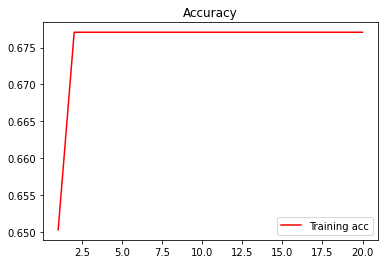

In [19]:
import matplotlib.pyplot as plt
plt.title('Accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.legend()
plt.savefig("Accuracy_ECT_16S.jpg")
plt.show()

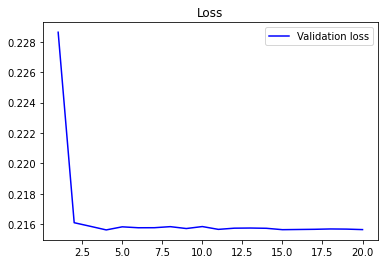

In [20]:
plt.title('Loss')
plt.plot(epochs, loss, 'blue', label='Validation loss')
plt.legend()
plt.savefig("Loss_ECT_16S.jpg")
plt.show()

In [21]:
model.save(model.name + "_ECT+16s_30_" + str(acc_) + "_.h5")